## Import packages

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

## Import data
Data source is from https://en.wikipedia.org/wiki/Transistor_count

In [2]:
df = pd.read_csv('data/moore.csv', delimiter='\t', header=None)
df.head(10)

,0,1,2,3,4,5
0,Intel 4004,"2,300",1971,Intel,"10,000 nm",12 mm²
1,Intel 8008,"3,500",1972,Intel,"10,000 nm",14 mm²
2,Intel 8080,"4,500",1974,Intel,"6,000 nm",20 mm²
3,Motorola 6800,"4,100",1974,Motorola,"6,000 nm",16 mm²
4,RCA 1802,"5,000",1974,RCA,"5,000 nm",27 mm²
5,TMS 1000,"8,000",1974[7],Texas Instruments,"8,000 nm",NaN
6,MOS Technology 6502,"3,510[8]",1975,MOS Technology,"8,000 nm",21 mm²
7,Intel 8085,"6,500",1976,Intel,"3,000 nm",20 mm²
8,Zilog Z80,"8,500",1976,Zilog,"4,000 nm",18 mm²
9,Intel 8086,"29,000",1978,Intel,"3,000 nm",33 mm²


## Clean data
Identify below patterns, remove them and convert to floats
* Thousand separater like '2,300'
* Prefix alphabets like 'cca 1,750,000,000'
* Quotation bracket like '1985[13]'

In [3]:
regex = re.compile(r'[^\d]+')

def extract_number(text):
    text = text.split('[')[0]
    number = regex.sub('', text)
    return int(number)

counts = np.array(df[1].apply(extract_number))
years = np.array(df[2].apply(extract_number))

print('counts: ', counts)
print('years: ', years)

counts:  [       2300        3500        4500        4100        5000        8000
        3510        6500        8500       29000        9000       29000
       68000       11500       55000      134000       22000      190000
       25000      275000       16000       30000      553000      180000
      250000      300000     1180235       35000     1350000     3100000
      578977     5500000     2500000     4300000     8800000     7500000
     7500000    21300000    22000000      111000    27400000     9500000
    42000000    21000000    45000000   220000000    55000000   105900000
    54300000   410000000   592000000   112000000   169000000   228000000
   241000000   291000000  1700000000   184000000   362000000   463000000
    26000000   169000000   411000000   789000000   758000000    47000000
   230000000   731000000  1900000000   904000000  1000000000  1200000000
  2300000000  2000000000  1400000000  1170000000  2600000000  1160000000
  2270000000  5000000000  1200000000  3100

## Scatter plots

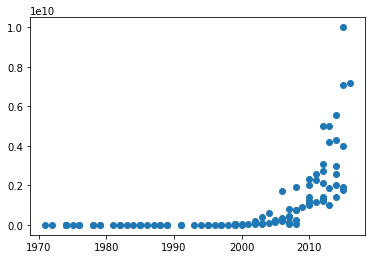

In [4]:
plt.scatter(years, counts)
plt.show()

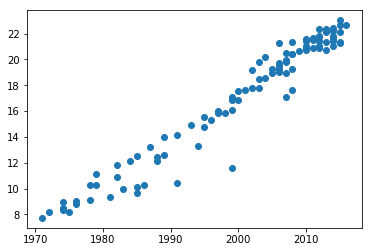

In [5]:
# It looks like exponential graph, try to apply log() function
plt.scatter(years, np.log(counts))
plt.show()

## Linear regression

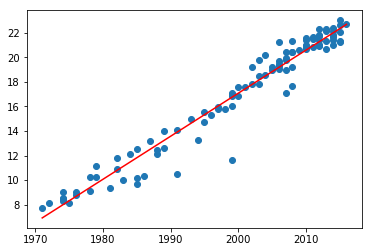

In [6]:
# Use X, Y for better representation
X = years
Y = np.log(counts)

# Compute a, b for Y = aX + b
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
lm = a * X + b

# Plot linear model and original scatter plot together
plt.scatter(X, Y)
plt.plot(X, lm, 'r')
plt.show()

## Verify Moore's Law
Moore's law is the observation that the number of transistors in a dense integrated circuit doubles approximately every two years.

In [7]:
# Simple mathematics calculation:
# log(Y) = aX1 + b --------- (1)
# log(2Y) = aX2 + b -------- (2)
# Here Y is the count of transistors, X1 & X2 are time
# (2) - (1) => X2 - X1 = log(2)/a

print('Estimated time to increase 2 times of transistor:', np.log(2)/a, 'years')

Estimated time to increase 2 times of transistor: 1.97453317238 years
